In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder, PowerTransformer,RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import skew
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE


In [2]:
df4=sns.load_dataset('titanic')

In [3]:
df4.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [4]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df4.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

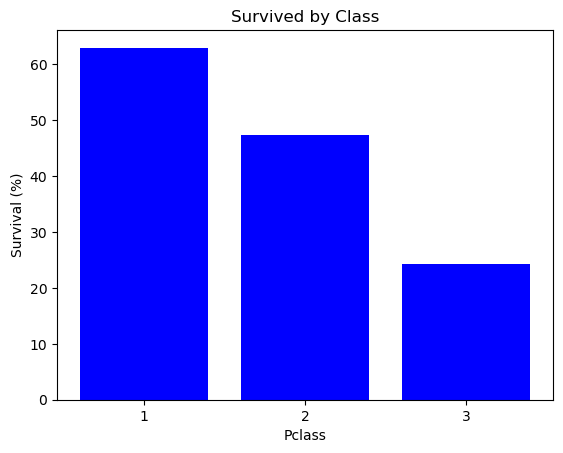

In [6]:
classes=df4.groupby('pclass')['survived'].mean().reset_index()
classes['survived']=classes['survived']*100
plt.bar(classes['pclass'],classes['survived'],color='blue')
plt.title("Survived by Class")
plt.xlabel('Pclass')
plt.ylabel('Survival (%)')
plt.xticks(classes['pclass'])
plt.show()

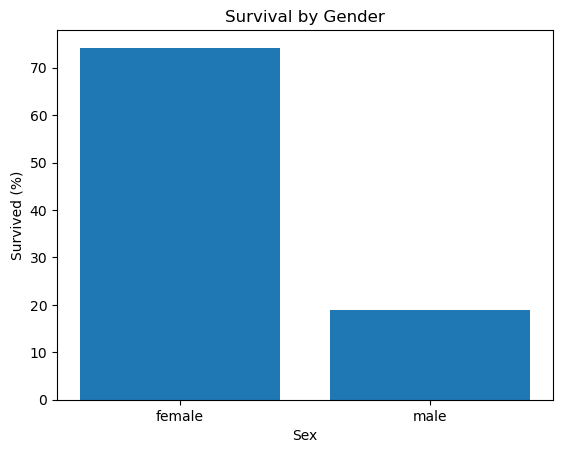

In [7]:
gender=df4.groupby('sex')['survived'].mean().reset_index()
gender['survived']=gender['survived']*100
plt.bar(gender['sex'],gender['survived'])
plt.title('Survival by Gender')
plt.xlabel("Sex")
plt.ylabel('Survived (%)')
plt.show()

<BarContainer object of 88 artists>

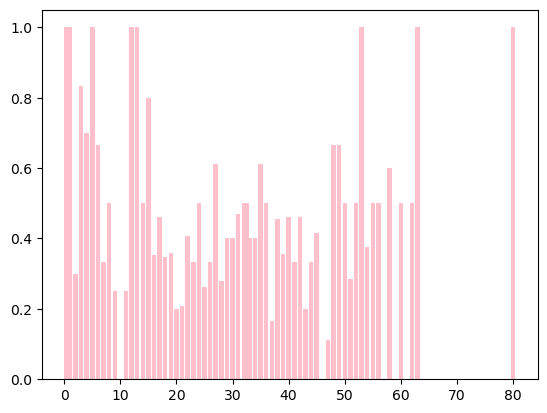

In [8]:
age_survived=df4.groupby('age')['survived'].mean().reset_index(name='count')
age_survived
plt.bar(age_survived['age'],age_survived['count'],color='pink')

Text(0, 0.5, 'Survived (%)')

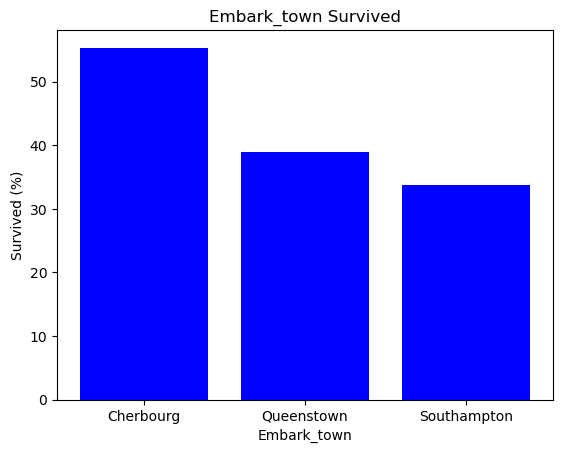

In [9]:
embark=df4.groupby('embark_town')['survived'].mean().reset_index()
embark['survived']=embark['survived']*100
plt.bar(embark['embark_town'],embark['survived'],color='blue')
plt.title('Embark_town Survived')
plt.xlabel('Embark_town')
plt.ylabel('Survived (%)')

In [10]:
df4['size']=df4['sibsp']+df4['parch']+1

In [11]:
df4.groupby('size')['survived'].mean()*100

size
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: survived, dtype: float64

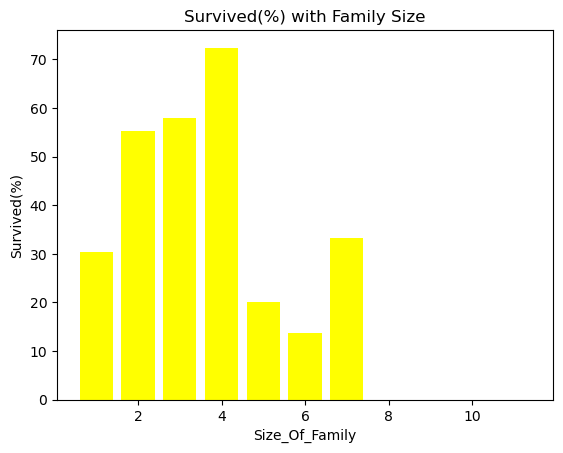

In [12]:
Family_size=df4.groupby('size')['survived'].mean()*100
plt.bar(Family_size.index,Family_size.values,color='yellow')
plt.title('Survived(%) with Family Size')
plt.xlabel('Size_Of_Family')
plt.ylabel('Survived(%)')
plt.show()

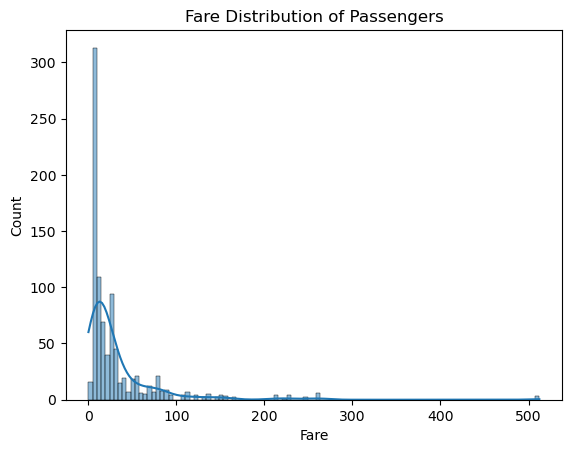

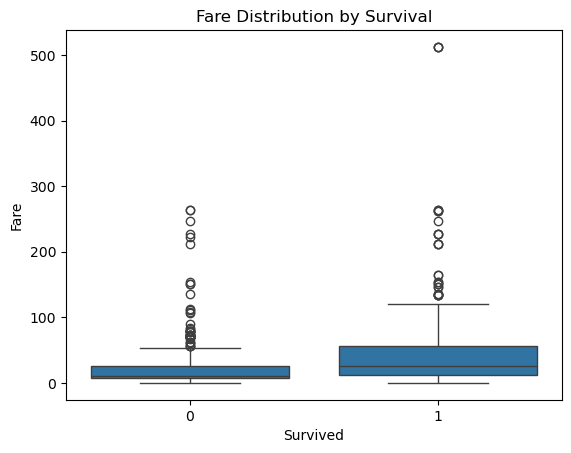

In [13]:
sns.histplot(df4['fare'],kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.show()
sns.boxplot(x='survived', y='fare', data=df4)
plt.title('Fare Distribution by Survival')
plt.ylabel('Fare')
plt.xlabel('Survived')
plt.show()

<Axes: xlabel='pclass', ylabel='survived'>

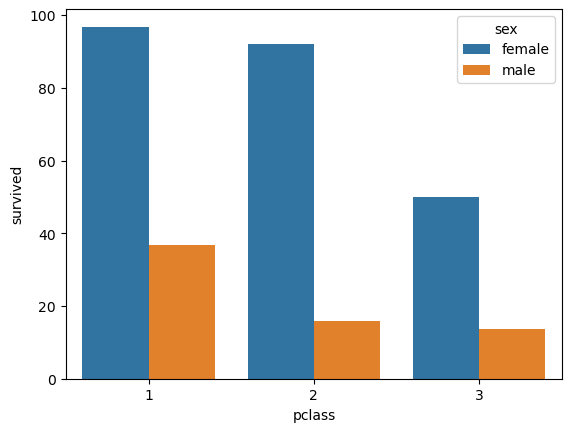

In [14]:
survival_by_gender_class=df4.groupby(['pclass','sex'])['survived'].mean().reset_index()
survival_by_gender_class['survived']=survival_by_gender_class['survived']*100
survival_by_gender_class
sns.barplot(x='pclass', y='survived', hue='sex', data=survival_by_gender_class)


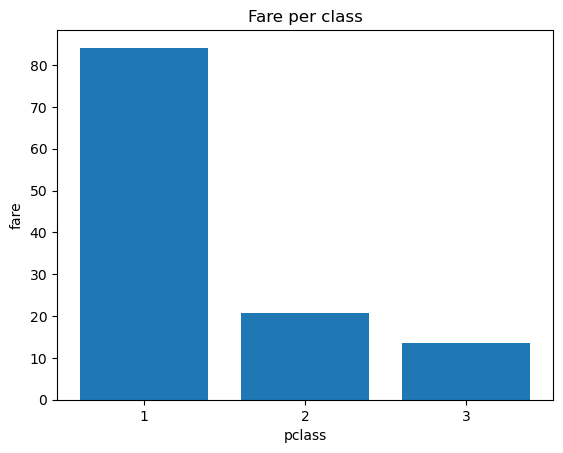

In [15]:
fare=df4.groupby(['pclass'])['fare'].mean().reset_index()
fare
plt.bar(fare['pclass'],fare['fare'])
plt.title('Fare per class')
plt.xlabel('pclass')
plt.ylabel('fare')
plt.xticks(fare['pclass'])
plt.show()

In [16]:
df4['fare'].skew()

4.787316519674893

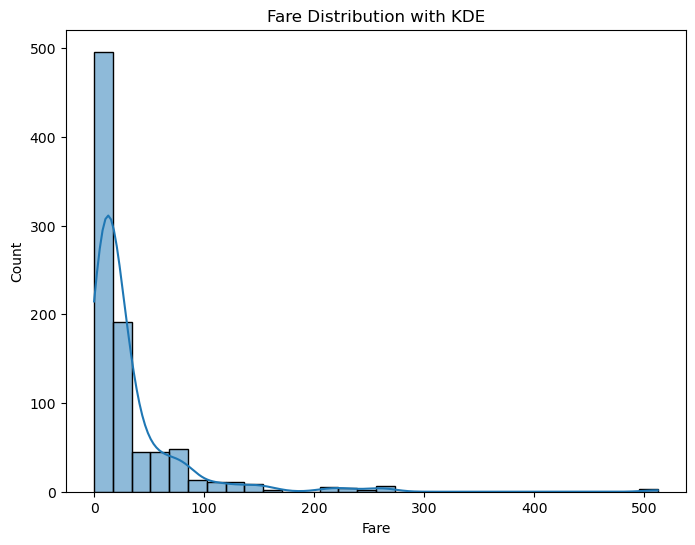

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df4['fare'], kde=True, bins=30)
plt.title('Fare Distribution with KDE')
plt.xlabel('Fare')
plt.show()


In [18]:
df4['fare'].skew()

4.787316519674893

<Axes: ylabel='fare'>

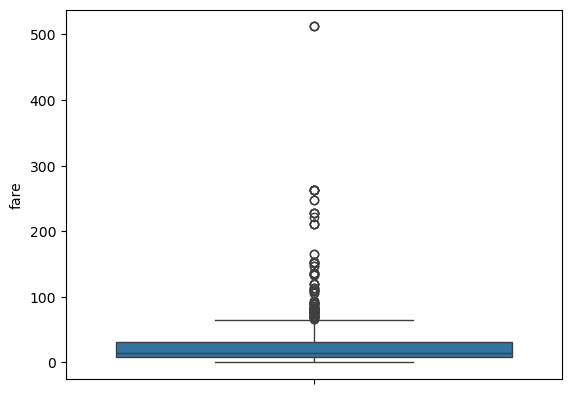

In [19]:
sns.boxplot(df4['fare'])

In [20]:
from scipy.stats import mstats

In [21]:
df4['winsorized_fare']=mstats.winsorize(df4['fare'],limits=[0.05,0.5])

In [22]:
df4['winsorized_fare'].skew()

-0.399902323964729

In [23]:
df4['age'].skew()

0.38910778230082704

In [24]:
df4['age_winsorized']=mstats.winsorize(df4['age'],limits=[0.05,0.05])


In [25]:
df4['age_winsorized'].skew()

0.5288616068196039

In [26]:
df4

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,size,winsorized_fare,age_winsorized
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,7.2500,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,14.4542,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,7.9250,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,14.4542,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,8.0500,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1,13.0000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,14.4542,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4,14.4542,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,14.4542,26.0


In [27]:
df4

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,size,winsorized_fare,age_winsorized
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,7.2500,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,14.4542,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,7.9250,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,14.4542,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,8.0500,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1,13.0000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,14.4542,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4,14.4542,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,14.4542,26.0


In [28]:
df4.drop(columns=['age','deck','embarked','fare','sibsp','parch','who','alive','adult_male'],inplace=True)

In [29]:
df4

,survived,pclass,sex,class,embark_town,alone,size,winsorized_fare,age_winsorized
0,0,3,male,Third,Southampton,False,2,7.2500,22.0
1,1,1,female,First,Cherbourg,False,2,14.4542,38.0
2,1,3,female,Third,Southampton,True,1,7.9250,26.0
3,1,1,female,First,Southampton,False,2,14.4542,35.0
4,0,3,male,Third,Southampton,True,1,8.0500,35.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,Second,Southampton,True,1,13.0000,27.0
887,1,1,female,First,Southampton,True,1,14.4542,19.0
888,0,3,female,Third,Southampton,False,4,14.4542,NaN
889,1,1,male,First,Cherbourg,True,1,14.4542,26.0


In [30]:
X=df4.drop(['survived'],axis=1)
y=df4['survived']


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)


In [32]:
Numerical_transformers = ColumnTransformer(
    transformers=[
        ("imputer1", make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(np.log1p, validate=True)), ['age_winsorized']),
        ("imputer2", make_pipeline(FunctionTransformer(np.sqrt, validate=True)), ['winsorized_fare'])
    ],
    remainder='passthrough'
)

In [33]:
Categorical_transformer=ColumnTransformer(
    transformers=[
        ("Encoder",make_pipeline( OneHotEncoder(drop='first',handle_unknown='ignore')),["sex","class","embark_town","alone"])
    ],remainder='passthrough')

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', Numerical_transformers, ['age_winsorized', 'winsorized_fare']),
        ('categorical',Categorical_transformer, ["sex","class","embark_town","alone",])
    ],remainder='passthrough')

In [35]:
classifiers = {
    'Logistic Regression L2': LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),  # L2 Regularization
    'Logistic Regression L1': LogisticRegression(penalty='l1', C=1.0, solver='liblinear'),  # L1 Regularization 
    'K-Nearest Neighbors': KNeighborsClassifier(),  
    'Support Vector Classifier': SVC(class_weight='balanced', probability=True),
    'Linear SVC': LinearSVC(),  
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),  
    'Gaussian Naive Bayes': GaussianNB(),  
    'Multi-layer Perceptron (MLP)': MLPClassifier(max_iter=4000),  
}

In [36]:
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'classifiers' is a dictionary with model names as keys and models as values
for model_name, model in classifiers.items():
    pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),  # Your preprocessing step, like OneHotEncoder, etc.
            ('scaler',MinMaxScaler()),    # You can change to RobustScaler() or others
            #('adasyn', ADASYN(sampling_strategy='minority', random_state=42)),# ADASYN resampling step
            #('smote', SMOTE(sampling_strategy='minority', random_state=42)),  # SMOTE resampling
            ('classifier', model)  # Model step
        ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on validation data
    y_pred = pipeline.predict(X_val)  # Make sure to use X_val for predictions

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    # Print the results for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)


Model: Logistic Regression L2
Accuracy: 0.8358
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       178
           1       0.75      0.77      0.76        90

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268

Model: Logistic Regression L1
Accuracy: 0.8358
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       178
           1       0.74      0.78      0.76        90

    accuracy                           0.84       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268

Model: K-Nearest Neighbors
Accuracy: 0.8545
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       178
           1       0.79      0

C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: Random Forest
Accuracy: 0.8433
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       178
           1       0.76      0.78      0.77        90

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268

Model: Decision Tree
Accuracy: 0.8060
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       178
           1       0.69      0.78      0.73        90

    accuracy                           0.81       268
   macro avg       0.78      0.80      0.79       268
weighted avg       0.81      0.81      0.81       268

Model: AdaBoost
Accuracy: 0.8284
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       178
           1       0.72      0.81      0.76        90

    

C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Multi-layer Perceptron (MLP)
Accuracy: 0.8396
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       178
           1       0.76      0.77      0.76        90

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



In [37]:
# Define k-fold cross-validation object
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over classifiers
for model_name, model in classifiers.items():
    accuracies = []

    # Perform k-fold cross-validation
    for train_index, val_index in kf.split(X_train, y_train):  # Using X_train and y_train for splitting
        X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fit pipeline with resampled data
        pipeline.fit(X_train_fold, y_train_fold)

        # Predict on validation data
        y_pred = pipeline.predict(X_val)

        # Evaluate model
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)

    # Calculate and print average accuracy for the model
    avg_accuracy = np.mean(accuracies)
    print(f"Model: {model_name}")
    print(f"Average Accuracy: {avg_accuracy:.4f}")

    # Optionally, print detailed classification report for the last fold
    print("Classification Report for Last Fold:")
    print(classification_report(y_val, y_pred))

C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Logistic Regression L2
Average Accuracy: 0.7833
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.94      0.66      0.78        50

    accuracy                           0.85       124
   macro avg       0.88      0.82      0.83       124
weighted avg       0.86      0.85      0.84       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Logistic Regression L1
Average Accuracy: 0.7849
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.94      0.66      0.78        50

    accuracy                           0.85       124
   macro avg       0.88      0.82      0.83       124
weighted avg       0.86      0.85      0.84       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: K-Nearest Neighbors
Average Accuracy: 0.7801
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.94      0.66      0.78        50

    accuracy                           0.85       124
   macro avg       0.88      0.82      0.83       124
weighted avg       0.86      0.85      0.84       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Support Vector Classifier
Average Accuracy: 0.7785
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.94      0.66      0.78        50

    accuracy                           0.85       124
   macro avg       0.88      0.82      0.83       124
weighted avg       0.86      0.85      0.84       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Linear SVC
Average Accuracy: 0.7769
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        74
           1       0.94      0.68      0.79        50

    accuracy                           0.85       124
   macro avg       0.88      0.83      0.84       124
weighted avg       0.87      0.85      0.85       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Random Forest
Average Accuracy: 0.7833
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.94      0.66      0.78        50

    accuracy                           0.85       124
   macro avg       0.88      0.82      0.83       124
weighted avg       0.86      0.85      0.84       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Decision Tree
Average Accuracy: 0.7785
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        74
           1       0.94      0.64      0.76        50

    accuracy                           0.84       124
   macro avg       0.87      0.81      0.82       124
weighted avg       0.86      0.84      0.83       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: AdaBoost
Average Accuracy: 0.7785
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        74
           1       0.94      0.64      0.76        50

    accuracy                           0.84       124
   macro avg       0.87      0.81      0.82       124
weighted avg       0.86      0.84      0.83       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Gaussian Naive Bayes
Average Accuracy: 0.7833
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.94      0.66      0.78        50

    accuracy                           0.85       124
   macro avg       0.88      0.82      0.83       124
weighted avg       0.86      0.85      0.84       124

Model: Multi-layer Perceptron (MLP)
Average Accuracy: 0.7785
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.94      0.66      0.78        50

    accuracy                           0.85       124
   macro avg       0.88      0.82      0.83       124
weighted avg       0.86      0.85      0.84       124



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[0.71268387 0.7592     0.78322581 0.78166452 0.7768    ]


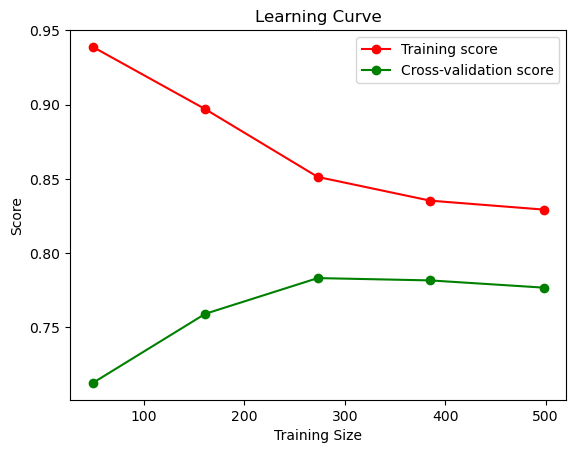

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
print(test_scores_mean)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [39]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_val, pipeline.predict_proba(X_val)[:, 1]):.4f}")


              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.94      0.66      0.78        50

    accuracy                           0.85       124
   macro avg       0.88      0.82      0.83       124
weighted avg       0.86      0.85      0.84       124

ROC-AUC Score: 0.8982


C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


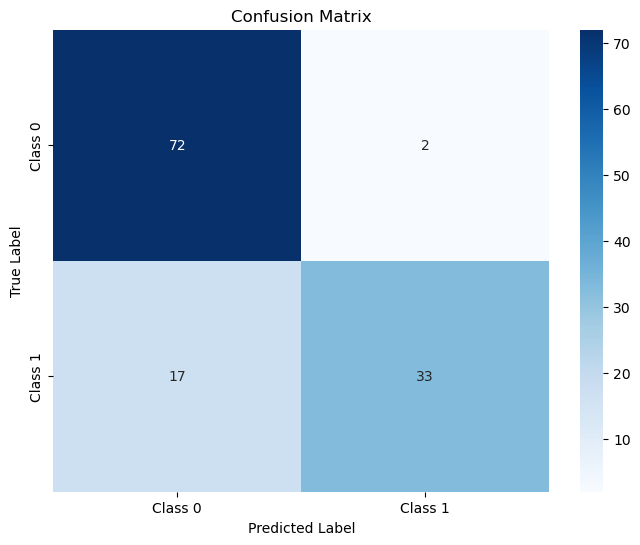

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_true and y_pred are your actual and predicted labels
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{confusion}")


Accuracy: 0.8467741935483871
Precision: 0.9428571428571428
Recall: 0.66
F1 Score: 0.7764705882352941
ROC AUC: 0.8164864864864866
Confusion Matrix:
[[72  2]
 [17 33]]
